In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
color_pal = sns.color_palette()
import xgboost as xgb

from sklearn.metrics import mean_squared_error

## Types of time series
![alt text](data/type.jpg "Title")

## Load Data

In [2]:
df = pd.read_csv('data/PJME_hourly.csv', sep=',')
print(df.shape)
df.head()

(145366, 2)


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


## 1. Explore and prepare data 

In [3]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

<Axes: title={'center': 'PJME Use in MW'}, xlabel='Datetime'>

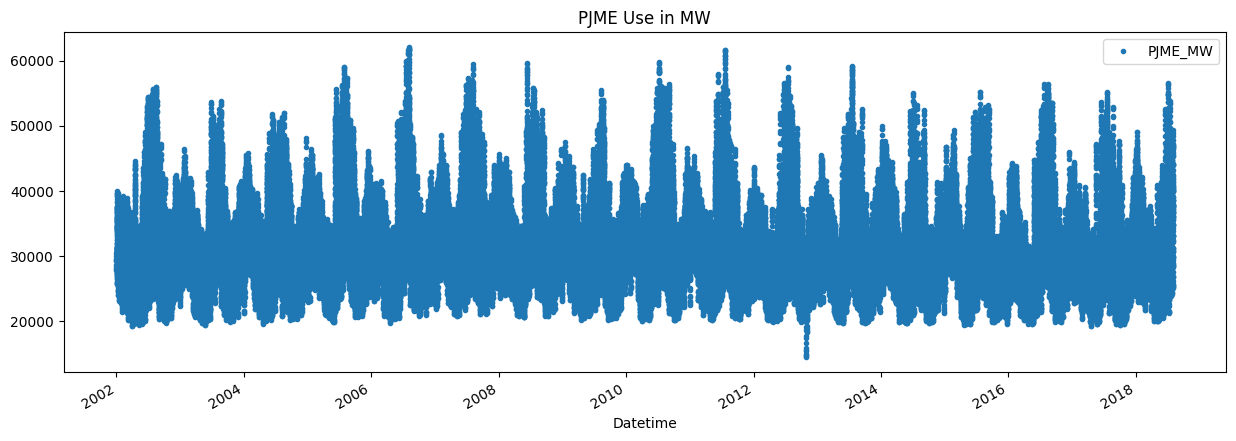

In [4]:
df.plot(style='.', figsize=(15, 5), color=color_pal, title='PJME Use in MW')

In [5]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

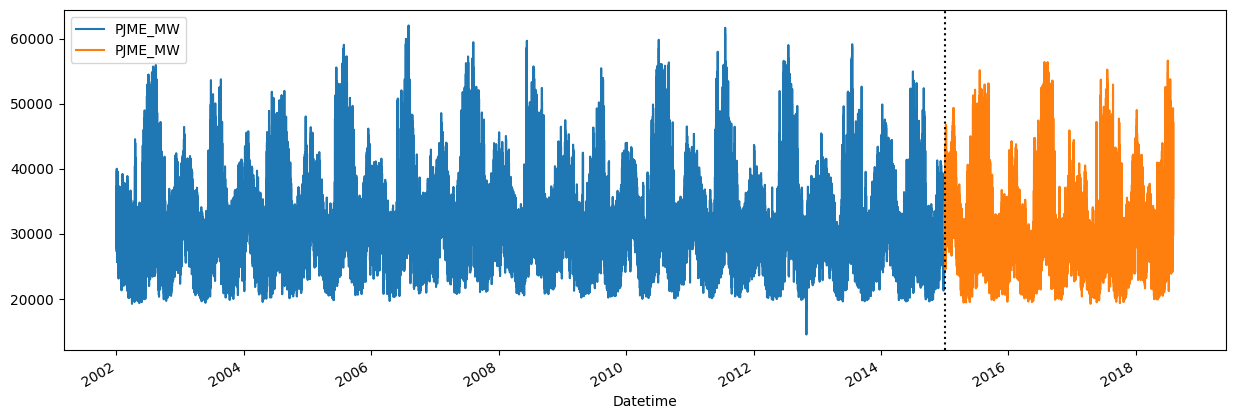

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls=':')

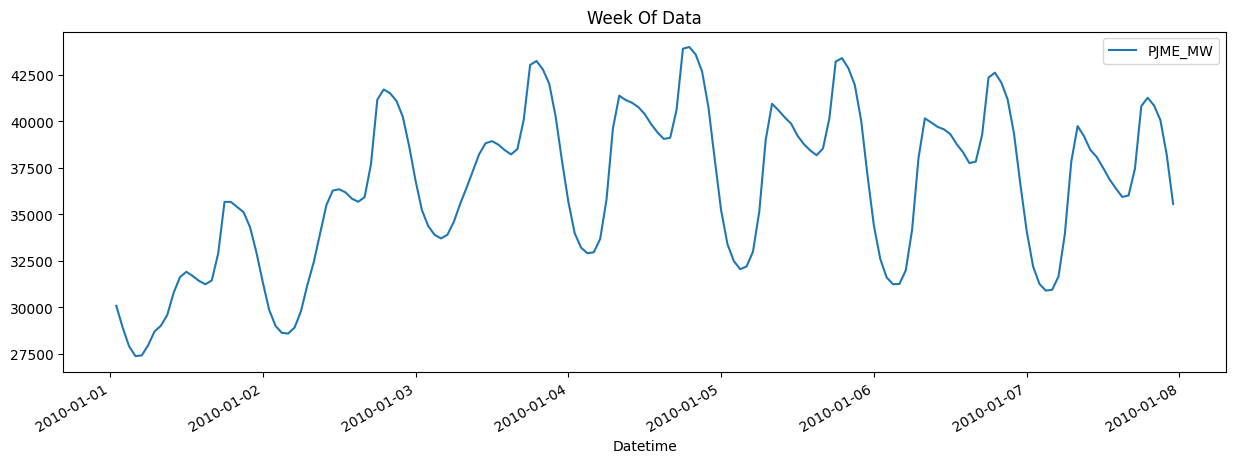

In [7]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Feature creation

In [8]:
def feature_creation(df):
    """
    Create time series
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek 
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear

    return df
df = feature_creation(df)

In [9]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365


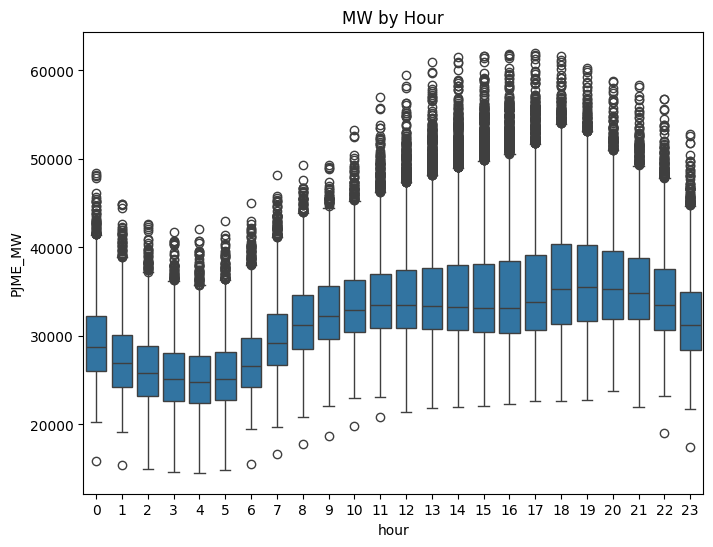

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

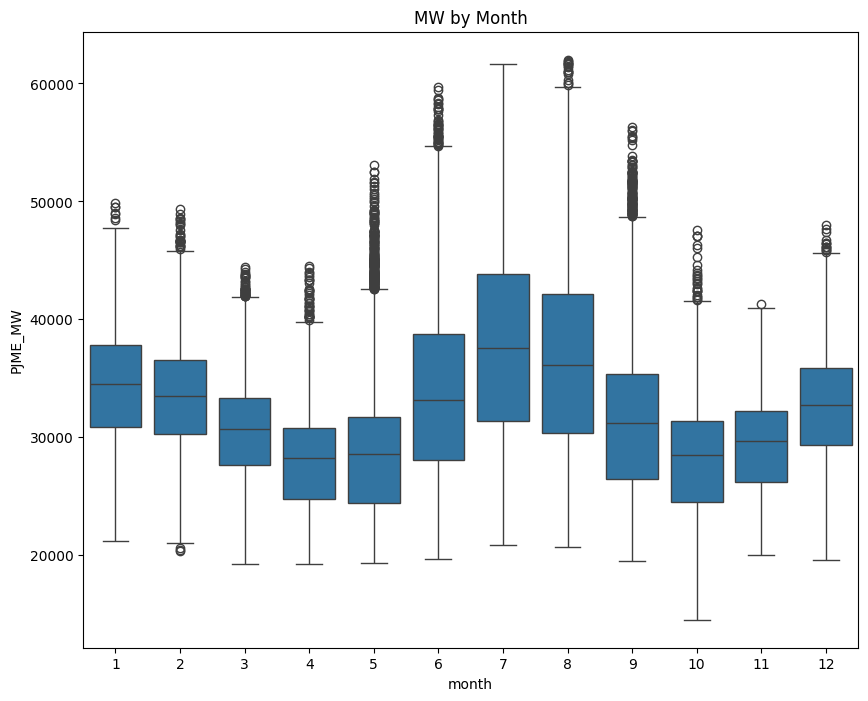

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('MW by Month')
plt.show()

## 2. Create Model

In [12]:
train = feature_creation(train)
test = feature_creation(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [13]:
reg = xgb.XGBRegressor(n_estimators=1000)
                       
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=True)
#Le MSE décroit puis recroit, il y a donc sur-apprentissage

[0]	validation_0-rmse:5179.23300	validation_1-rmse:5359.30943
[1]	validation_0-rmse:4375.01962	validation_1-rmse:4687.00132
[2]	validation_0-rmse:3874.17400	validation_1-rmse:4279.28898
[3]	validation_0-rmse:3572.89245	validation_1-rmse:4082.60841
[4]	validation_0-rmse:3372.17780	validation_1-rmse:3952.54672
[5]	validation_0-rmse:3247.62891	validation_1-rmse:3881.05746
[6]	validation_0-rmse:3162.64310	validation_1-rmse:3856.13245
[7]	validation_0-rmse:3073.82520	validation_1-rmse:3790.13994
[8]	validation_0-rmse:3021.60497	validation_1-rmse:3790.80157
[9]	validation_0-rmse:2967.30458	validation_1-rmse:3762.76936
[10]	validation_0-rmse:2888.42820	validation_1-rmse:3765.37637
[11]	validation_0-rmse:2870.15625	validation_1-rmse:3759.06623
[12]	validation_0-rmse:2813.33663	validation_1-rmse:3779.46019
[13]	validation_0-rmse:2779.04333	validation_1-rmse:3817.51231
[14]	validation_0-rmse:2760.93139	validation_1-rmse:3808.04851
[15]	validation_0-rmse:2739.22479	validation_1-rmse:3798.04910
[1

C:\Users\bjauseau\AppData\Local\anaconda3\envs\MLTP\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:2596.79641	validation_1-rmse:3910.05412
[19]	validation_0-rmse:2590.51660	validation_1-rmse:3914.22408
[20]	validation_0-rmse:2570.54763	validation_1-rmse:3912.28614
[21]	validation_0-rmse:2530.67243	validation_1-rmse:3932.01994
[22]	validation_0-rmse:2520.27368	validation_1-rmse:3928.43189
[23]	validation_0-rmse:2480.83222	validation_1-rmse:3931.77785
[24]	validation_0-rmse:2476.51753	validation_1-rmse:3932.41579
[25]	validation_0-rmse:2451.58645	validation_1-rmse:3930.37214
[26]	validation_0-rmse:2431.65979	validation_1-rmse:3948.82818
[27]	validation_0-rmse:2401.99443	validation_1-rmse:3959.78301
[28]	validation_0-rmse:2394.39674	validation_1-rmse:3964.00110
[29]	validation_0-rmse:2367.68750	validation_1-rmse:4025.17732
[30]	validation_0-rmse:2365.51005	validation_1-rmse:4041.38739
[31]	validation_0-rmse:2357.04026	validation_1-rmse:4044.69890
[32]	validation_0-rmse:2319.32889	validation_1-rmse:4054.18184
[33]	validation_0-rmse:2283.11151	validation_1-rmse:407

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [14]:
reg = xgb.XGBRegressor(n_estimators=1000, 
                      early_stopping_rounds=50,
                      learning_rate=0.01)
                       
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.83677
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.99037
[417]	validation_0-rmse:2801.66222	validation_1-rmse:3749.30897


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 3. Feature Selection

<Axes: title={'center': 'Feature Importance'}>

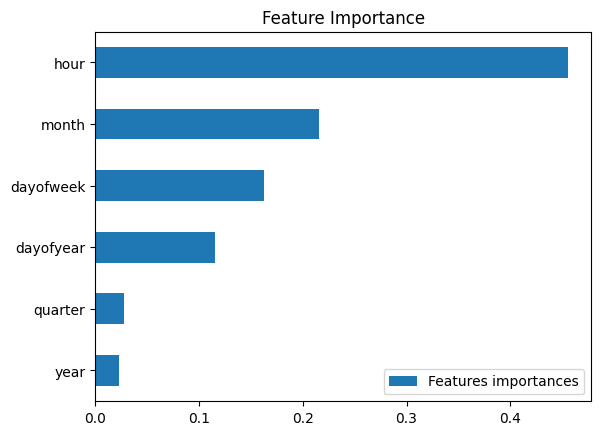

In [15]:
df_features = pd.DataFrame(data=reg.feature_importances_,
                          index=reg.feature_names_in_,
                          columns=['Features importances'])

df_features.sort_values('Features importances').plot(kind='barh', title='Feature Importance')

## 4. Test prediction

In [16]:
test['prediction'] = y_pred
reg.score(X_train, y_train)

0.7991078975591297

### Evaluation

In [17]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.6635395265442082

In [18]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3741.16


In [19]:
test['prediction'] = y_pred

In [20]:
test.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,32393.351562
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365,29040.167969
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365,27877.017578
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365,27576.720703
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365,27576.720703


## Visualiz prediction

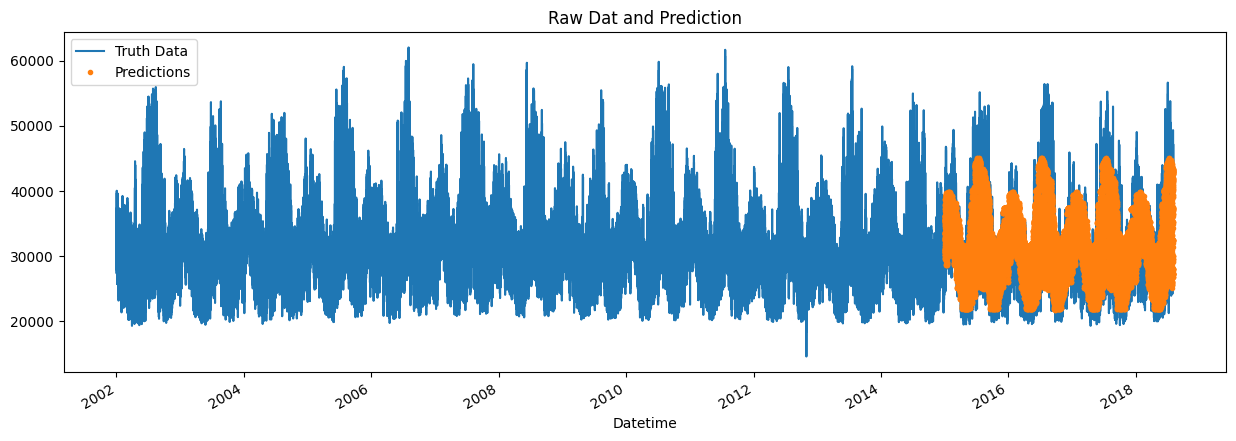

In [21]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

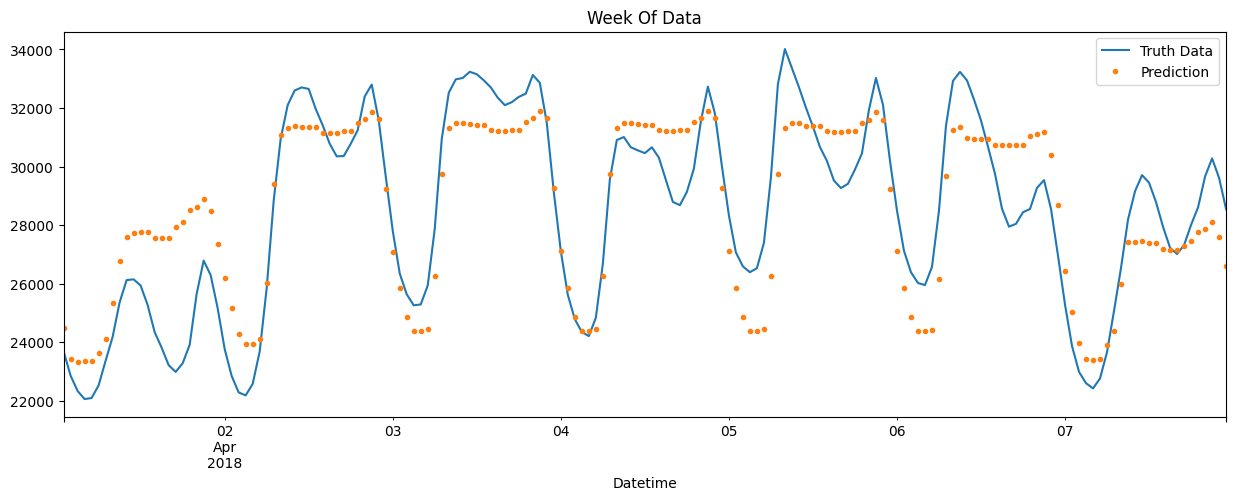

In [22]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

## 5. Improving model

## Test other model 

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

def gradient_model(x_train, y_train):
    print("Gradnient Boosting")
    gradient  = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)
    
    gradient.fit(x_train, y_train)
    
    return gradient    

In [24]:
from sklearn.neighbors import KNeighborsRegressor
def KNN_model(x_train, y_train):
    print("Knn Boosting")
    knn = KNeighborsRegressor(n_neighbors=5)
    
    knn.fit(x_train, y_train)
    
    return knn    

In [25]:
def XGB_model(x_train, y_train):
    print("XGB Boosting")
    reg = xgb.XGBRegressor(n_estimators=1000, 
                      early_stopping_rounds=50,
                      learning_rate=0.01)
                       
    reg.fit(x_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)
    
    return reg    

In [26]:
def build_and_train_model(dataframe, reg_fn):   
    
    train = dataframe.loc[df.index < '01-01-2015']
    test = dataframe.loc[df.index >= '01-01-2015']
    dataframe = dataframe.drop('prediction', axis=1)
    train = feature_creation(train)
    test = feature_creation(test)
    
    x_train = train[FEATURES]
    y_train = train[TARGET]
    
    x_test = test[FEATURES]
    y_test = test[TARGET]
    model = reg_fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)
    
    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("RMSE:", rmse)

    test['prediction'] = y_pred
    dataframe = dataframe.merge(test[['prediction']], how='left', left_index=True, right_index=True)
    
    ax = dataframe.loc[(dataframe.index > '04-01-2018') & (dataframe.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(10, 2.5), title='Week Of Data')
    dataframe.loc[(dataframe.index > '04-01-2018') & (dataframe.index < '04-08-2018')]['prediction'] \
        .plot(style='.')
    plt.legend(['Truth Data','Prediction'])
    plt.show()   

Gradnient Boosting
Training Score :  0.48394996685334946
Testing Score :  0.41922204191149326
RMSE: 4915.930248009741


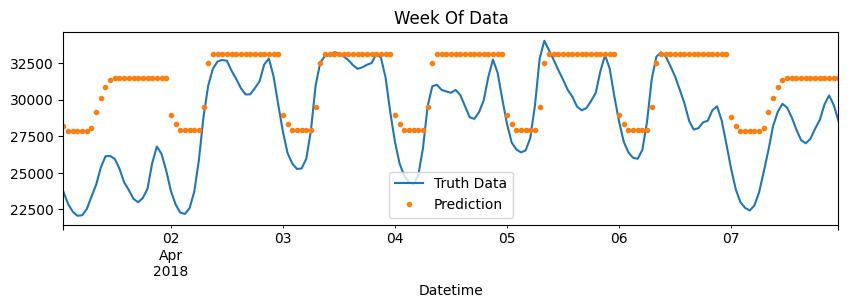

In [27]:
build_and_train_model(df, gradient_model)

Knn Boosting
Training Score :  0.9573581568061197
Testing Score :  0.46346813301734724
RMSE: 4724.962980146377


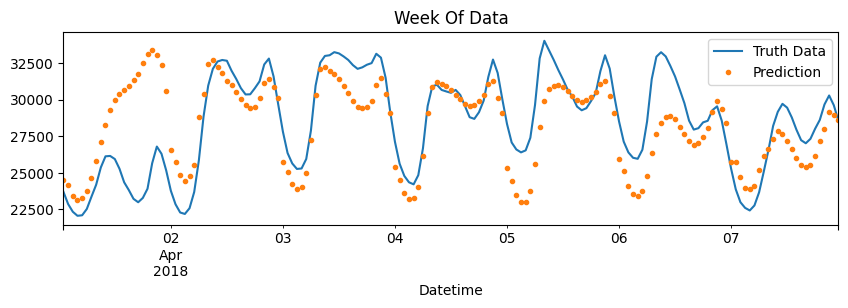

In [28]:
build_and_train_model(df, KNN_model)

XGB Boosting
[0]	validation_0-rmse:6425.79877	validation_1-rmse:6479.81619
[100]	validation_0-rmse:5630.52143	validation_1-rmse:4312.03224
[200]	validation_0-rmse:5742.49847	validation_1-rmse:3864.56545
[300]	validation_0-rmse:5853.74106	validation_1-rmse:3748.83677
[400]	validation_0-rmse:5939.83469	validation_1-rmse:3744.99037
[416]	validation_0-rmse:5949.91027	validation_1-rmse:3748.46558
Training Score :  0.7991078975591296
Testing Score :  0.6636674153106727
RMSE: 3740.977720313924


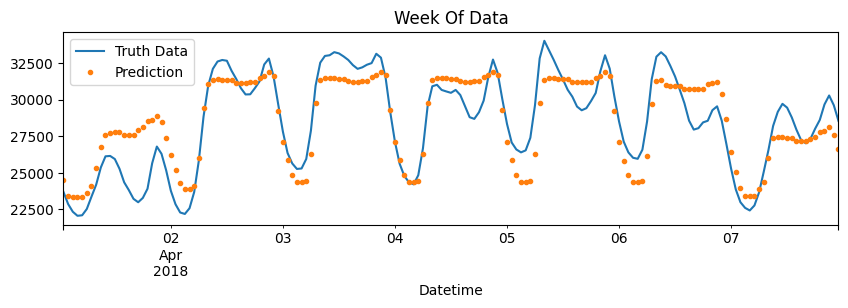

In [29]:
build_and_train_model(df, XGB_model)